# Assignment 1-C

We are given the optimization problem

$minimize$ $E(w) = \frac{1}{2}\sum_{n=1}^{N} (y_n - t_n)^2$ subject to $|w_1|^q + |w_2|^q \le \eta$

where $y_n = w_1x_{n_1} + w_2x_{n_2}$, $N$ is the total umber of samples, and $x_{n_1}$ and $x_{n_2}$ represent the two features of the $n^{th}$ sample.

In [67]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from math import ceil
import matplotlib.cm as cm
from mpl_toolkits import mplot3d

We first extract the three columns of the given dataset separately, namely $X1$, $X2$ and $Y$.

In [68]:
data = pd.read_csv("fods_1.csv").to_numpy()
X1 = data[:, :1]
X2 = data[:, 1:2]
X = data[:, :2]
Y = data[:, 2]
X1 = X1.reshape([len(X1), 1])
X2 = X2.reshape([len(X2), 1])
Y = Y.reshape([len(Y), 1])

The error function is as follows

 $E(w) = \frac{1}{2}\sum_{n=1}^{N} (y_n - t_n)^2$

 $= \frac{1}{2}\sum_{n=1}^{N} (w_1x_{n_1} + w_2x_{n_2} - t_n)^2$

 This expression, when expanded, will contain terms $w_1^2, w_2^2, w_1w_2, w_1, w_2$ and a constant term. The coefficients of these terms in the expansion are evaluated separately using matrix multiplications.

 Coefficient of $w_1^2$ is $0.5*\sum_{n=1}^{N}x_{1n}^2$

 Coefficient of $w_2^2$ is $0.5*\sum_{n=1}^{N}x_{2n}^2$

 Coefficient of $w_1w_2$ is $\sum_{n=1}^{N}x_{1n}x_{2n}$

 Coefficient of $w_1$ is $-\sum_{n=1}^{N}t_nx_{1n}$

 Coefficient of $w_2$ is $-\sum_{n=1}^{N}t_nx_{2n}$

 The constant term is $0.5*\sum_{n=1}^{N}t_n^2$

In [69]:
w1_sq_coeff = 0.5*(X1.T @ X1)[0][0]
w2_sq_coeff = 0.5*(X2.T @ X2)[0][0]
w1w2_coeff = (X1.T @ X2)[0][0]
w1_coeff = -(X1.T @ Y)[0][0]
w2_coeff = -(X2.T @ Y)[0][0]
const = 0.5*(Y.T @ Y)[0][0]

### Error function

In [70]:
def error_function(Y, W, X):
    mat = Y - X @ W
    return (1 / len(X)) * ((mat.T @ mat)[0][0])

### Error contour plot

Since the error function will be an implicit function (cannot be expressed purely in terms of $w_1$ and $w_2$), we need to determine a set of values for $w_1$ and $w_2$ for which we will be plotting the contours. This is done by choosing a start value, an end value and an increment for both $w_1$ and $w_2$. 

Then we align the axes such that the origin is at the center of the graph, and create the implicit equation of the cost function using the coefficients calculated previously, and then finally plot it using `plt.contour()`. 

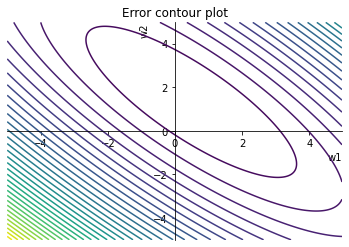

In [71]:
delta = 0.025
w1_range = np.arange(-5.0, 5.0, delta)
w2_range = np.arange(-5.0, 5.0, delta)
w1, w2 = np.meshgrid(w1_range, w2_range)

ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')

cost_func = w1_sq_coeff * w1 * w1 + w2_sq_coeff * w2 * w2 + w1w2_coeff * w1 * w2 + w1_coeff * w1 + w2_coeff * w2 + const
plt.contour(w1, w2, cost_func, 40)
plt.xlabel("w1", loc='right')
plt.ylabel("w2", loc='top')
plt.title("Error contour plot")
plt.show()

#### Plotting constraint regions, finding points of intersection with error function contour plots and generating mean squared errors

We now plot the constraint equations by plugging in appropriate q and $\eta$ values in the constraint equations. Then we estimate the point of intersection where both the curves are tangential to each other. The $w_1$ and $w_2$ values at this point are used to generate our model. 

##### Case #1: $|w_1|^{0.5} + |w_2|^{0.5} \le 1.4$

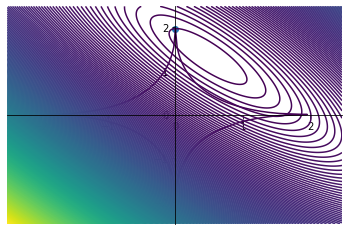

In [72]:
w1_range = np.arange(-2.5, 2.5, delta)
w2_range = np.arange(-2.5, 2.5, delta)
w1, w2 = np.meshgrid(w1_range, w2_range)

ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')

cost_func = w1_sq_coeff * w1 * w1 + w2_sq_coeff * w2 * w2 + w1w2_coeff * w1 * w2 + w1_coeff * w1 + w2_coeff * w2 + const
eqn1 = 1.4 - abs(w1) ** 0.5 - abs(w2) ** 0.5

plt.contour(w1, w2, eqn1, [0])
plt.contour(w1, w2, cost_func, 300)
plt.scatter(0, 1.96)
plt.show()

Therefore, the model that we get through the intersection of the contour plots and the constraint equation is $y = 1.96x_2$. We now calculate the mean squared error using the `error_function` above.

In [73]:
W = np.array([[0], [1.96]])
res = error_function(Y, W, X)
res

3.27711766887326

##### Case #2: $|w_1| + |w_2| \le 0.1$

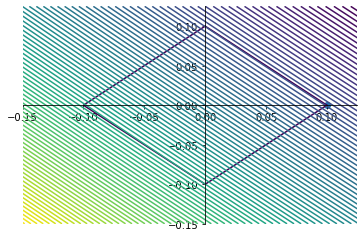

In [74]:
w1_range = np.arange(-0.15, 0.15, delta)
w2_range = np.arange(-0.15, 0.15, delta)
w1, w2 = np.meshgrid(w1_range, w2_range)

ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')

cost_func = w1_sq_coeff * w1 * w1 + w2_sq_coeff * w2 * w2 + w1w2_coeff * w1 * w2 + w1_coeff * w1 + w2_coeff * w2 + const
eqn2 = 0.1 - abs(w1) - abs(w2)

plt.contour(w1, w2, eqn2, [0])
plt.contour(w1, w2, cost_func, 100)
plt.scatter(0.1, 0)
plt.show()

Therefore, the model that we get through the intersection of the contour plots and the constraint equation is $y = 0.1x_1$. We now calculate the mean squared error using the `error_function` above.

In [75]:
W = np.array([[0.1], [0]])
res = error_function(Y, W, X)
res

22.0870341009707

##### Case #3: $|w_1|^2 + |w_2|^2 \le 0.035$

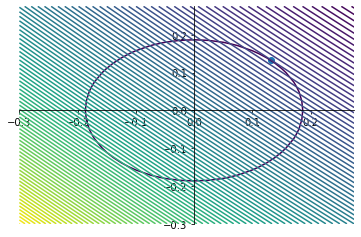

In [76]:
w1_range = np.arange(-0.3, 0.3, delta)
w2_range = np.arange(-0.3, 0.3, delta)
w1, w2 = np.meshgrid(w1_range, w2_range)

ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')

cost_func = w1_sq_coeff * w1 * w1 + w2_sq_coeff * w2 * w2 + w1w2_coeff * w1 * w2 + w1_coeff * w1 + w2_coeff * w2 + const
eqn1 = 0.035 - w1 * w1 - w2 * w2

plt.contour(w1, w2, eqn1, [0])
plt.contour(w1, w2, cost_func, 100)
plt.scatter(0.132, 0.132)
plt.show()

Therefore, the model that we get through the intersection of the contour plots and the constraint equation is $y = 0.132x_1 + 0.132x_2$. We now calculate the mean squared error using the `error_function` above.

In [77]:
W = np.array([[0.132], [0.132]])
res = error_function(Y, W, X)
res

18.492851787217578

##### Case #4: $|w_1|^4 + |w_2|^4 \le 0.052$

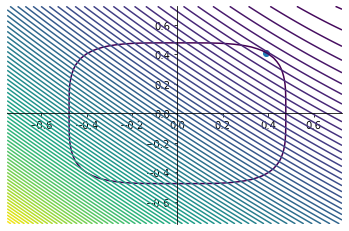

In [78]:
w1_range = np.arange(-0.75, 0.75, delta)
w2_range = np.arange(-0.75, 0.75, delta)
w1, w2 = np.meshgrid(w1_range, w2_range)

ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')

cost_func = w1_sq_coeff * w1 * w1 + w2_sq_coeff * w2 * w2 + w1w2_coeff * w1 * w2 + w1_coeff * w1 + w2_coeff * w2 + const
eqn1 = 0.052 - w1 * w1 * w1 * w1 - w2 * w2 * w2 * w2

plt.contour(w1, w2, eqn1, [0])
plt.contour(w1, w2, cost_func, 80)
plt.scatter(0.39, 0.41)
plt.show()

Therefore, the model that we get through the intersection of the contour plots and the constraint equation is $y = 0.39x_1 + 0.41x_2$. We now calculate the mean squared error using the `error_function` above.

In [79]:
W = np.array([[0.39], [0.41]])
res = error_function(Y, W, X)
res

9.321682379247619

In [80]:
def error_function_1(w1, w2):
    sum = 0
    for i in range(len(X)):
        sum += 0.5*(Y[i][0]*Y[i][0] + w1*w1*X1[i][0]*X1[i][0] + w2*w2*X2[i][0]*X2[i][0] - 2*w1*Y[i][0]*X1[i][0] - 2*w2*Y[i][0]*X2[i][0] + 2*w1*w2*X1[i][0]*X2[i][0])
    sum *= 2
    sum /= len(X)
    return sum

In [81]:
print(error_function_1(0, 1.96))
print(error_function_1(0.1, 0))
print(error_function_1(0.132, 0.132))
print(error_function_1(0.39, 0.41))

3.2771176688732564
22.08703410097069
18.492851787217557
9.321682379247623
